In [1]:
1 + 3

4

In [2]:
3 * 4

12

In [3]:
t = 0

In [4]:
t

0

In [5]:
t = 1

In [6]:
type(t)

int

In [7]:
1 + 0.5 

1.5

In [8]:
10.5 - 2

8.5

In [9]:
c = 2 + 0.75

In [10]:
c

2.75

In [11]:
type(c)

float

In [12]:
c0 = -9.5

In [13]:
c1 = 11.75

In [14]:
c = (c0, c1)

In [15]:
c

(-9.5, 11.75)

In [16]:
type(c)

tuple

In [17]:
c[0]

-9.5

In [18]:
c[1]

11.75

In [19]:
c = [c0, c1]

In [20]:
c

[-9.5, 11.75]

In [21]:
type(c)

list

In [22]:
c[0]

-9.5

In [23]:
c[1]

11.75

In [24]:
c[0] = 10

In [25]:
c

[10, 11.75]

In [26]:
c = (-10, 12)

In [27]:
R = sum(c)

In [29]:
R

2

In [30]:
r = R / abs(c[0])

In [32]:
r

0.2

In [33]:
i = 0.1

In [34]:
def D(c1):
    return c1 / (1 + i)

In [35]:
D(12.1)

10.999999999999998

In [36]:
D(11)

10.0

In [37]:
def NPV(c):
    return c[0] + D(c[1])

In [38]:
cA = (-10.5, 12.1)

In [39]:
cB = (-10.5, 11)

In [40]:
NPV(cA)

0.4999999999999982

In [41]:
NPV(cB)

-0.5

In [42]:
import numpy as np

In [43]:
c0 = -10

In [44]:
c1 = np.array((20, 5))

In [45]:
type(c1)

numpy.ndarray

In [46]:
c1

array([20,  5])

In [47]:
c = (c0, c1)

In [48]:
c

(-10, array([20,  5]))

In [49]:
1.5 * c1 + 2

array([32. ,  9.5])

In [50]:
c1 + 1.5 * np.array((10, 4))

array([35., 11.])

In [51]:
S0 = 10

In [52]:
S1 = np.array((12.5, 7.5))

In [53]:
S = (S0, S1)

In [54]:
S

(10, array([12.5,  7.5]))

In [55]:
S[0]

10

In [56]:
S[1][0]

12.5

In [57]:
S[1][1]

7.5

In [58]:
p = 0.4

In [59]:
1 - p 

0.6

In [60]:
P = np.array((p, 1-p))

In [61]:
P

array([0.4, 0.6])

In [62]:
S0 = 10

In [63]:
S1 = np.array((20, 5))

In [64]:
np.dot(P, S1)

11.0

In [65]:
def ER(x0, x1):
    return np.dot(P, x1) - x0

In [66]:
ER(S0, S1)

1.0

In [67]:
def mu(x0, x1):
    return (np.dot(P, x1) - x0) / x0

In [68]:
mu(S0, S1)

0.1

In [69]:
def r(x0, x1):
    return (x1 - x0) / x0

In [70]:
r(S0, S1)

array([ 1. , -0.5])

In [71]:
mu = np.dot(P, r(S0, S1))

In [72]:
mu

0.10000000000000003

In [73]:
def sigma2(P, r, mu):
    return np.dot(P, (r - mu) ** 2)

In [74]:
sigma2(P, r(S0, S1), mu)

0.54

In [75]:
def sigma(P, r, mu):
    return np.sqrt(np.dot(P, (r - mu) ** 2))

In [76]:
sigma(P, r(S0, S1), mu)

0.7348469228349535

In [77]:
S1 = np.arange(20)

In [78]:
S1[:7]

array([0, 1, 2, 3, 4, 5, 6])

In [79]:
K = 10

In [80]:
C1 = np.maximum(S1 - K, 0)

In [81]:
C1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
from pylab import mpl, plt
# plotting configuration
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_formats = ['svg']

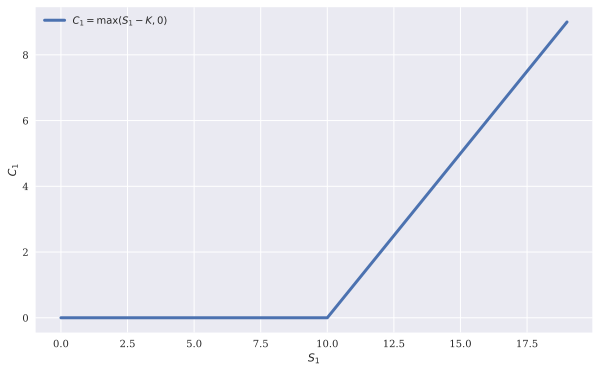

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(S1, C1, lw = 3.0, label='$C_1 = \max(S_1 - K, 0)$')
plt.legend(loc=0)
plt.xlabel('$S_1$')
plt.ylabel('$C_1$');

In [84]:
B = (10, np.array((11, 11)))

In [85]:
S = (10, np.array((20, 5)))

In [86]:
M = np.array((B[1], S[1])).T

In [87]:
M

array([[11, 20],
       [11,  5]])

In [88]:
K = 15

In [89]:
C1 = np.maximum(S[1] - K, 0)

In [90]:
C1

array([5, 0])

In [91]:
phi = np.linalg.solve(M, C1)

In [92]:
phi

array([-0.15151515,  0.33333333])

In [93]:
C0 = np.dot(phi, (B[0], S[0]))

In [94]:
C0

1.8181818181818183

In [95]:
10/3 - 50/33

1.8181818181818183

In [96]:
from numpy.random import default_rng
rng = default_rng(100)

In [97]:
n = 1000

In [98]:
b = rng.random(n)

In [99]:
b[:5]

array([0.83498163, 0.59655403, 0.28886324, 0.04295157, 0.9736544 ])

In [100]:
s = (1 - b)

In [101]:
s[:5]

array([0.16501837, 0.40344597, 0.71113676, 0.95704843, 0.0263456 ])

In [102]:
def portfolio(b, s):
    A = [b[i] * B[1] + s[i] * S[1] for i in range(n)]
    return np.array(A)

In [103]:
A = portfolio(b, s)

In [104]:
A[:3]

array([[12.48516533, 10.00988978],
       [14.63101376,  8.57932416],
       [17.40023082,  6.73317945]])

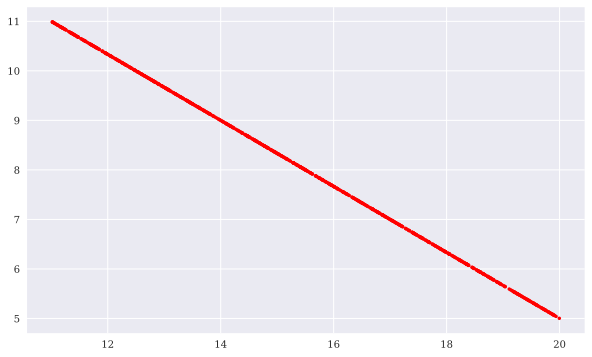

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(A[:, 0], A[:, 1], 'r.');

In [106]:
s = rng.random(n)

In [ ]:
b[:5] + s[:5]

In [107]:
A = portfolio(b, s)

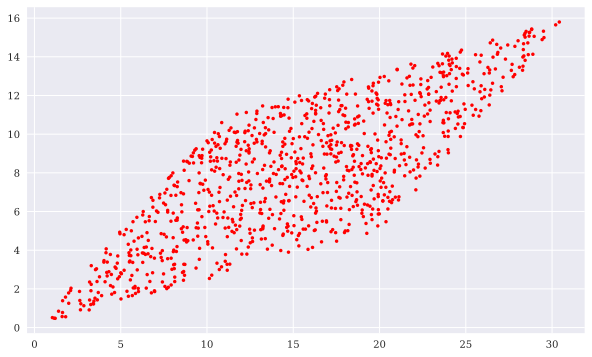

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(A[:, 0], A[:, 1], 'r.');

In [109]:
b = rng.standard_normal(n)

In [110]:
s = rng.standard_normal(n)

In [111]:
b[:5] + s[:5]

array([-0.23046605, -3.45760465,  1.10260637, -2.44445777,  1.05866637])

In [112]:
A = portfolio(b, s)

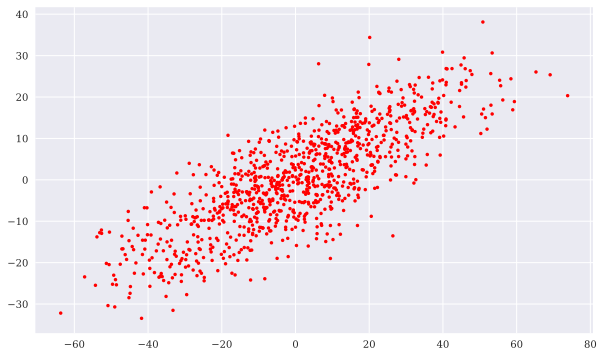

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(A[:, 0], A[:, 1], 'r.');

In [114]:
i = (B[1][0] - B[0]) / B[0]

In [115]:
i

0.1

In [117]:
q = (S[0] * (1 + i) - S[1][1]) / (S[1][0] - S[1][1])

In [118]:
q

0.4

In [119]:
Q = (q, 1-q)

In [120]:
np.dot(Q, C1) / (1 + i)

1.8181818181818181

In [121]:
B = (10, np.array((11, 11)))

In [122]:
S = (10, np.array((20, 5)))

In [123]:
M = np.array((B[1], S[1])).T

In [124]:
M

array([[11, 20],
       [11,  5]])

In [125]:
M0 = np.array((B[0], S[0]))

In [126]:
R = M / M0 - 1

In [127]:
R

array([[ 0.1,  1. ],
       [ 0.1, -0.5]])

In [128]:
P = np.array((0.5, 0.5))

In [129]:
np.dot(P, R)

array([0.1 , 0.25])

In [130]:
s = 0.55

In [131]:
phi = (1-s, s)

In [132]:
mu = np.dot(phi, np.dot(P, R))

In [133]:
mu

0.18250000000000005

In [134]:
sigma = s * R[:, 1].std()

In [135]:
sigma

0.41250000000000003

In [136]:
values = np.linspace(0, 1, 25)

In [137]:
mu = [np.dot(((1-s), s), np.dot(P, R))
      for s in values]

In [138]:
sigma = [s * R[:, 1].std() for s in values]

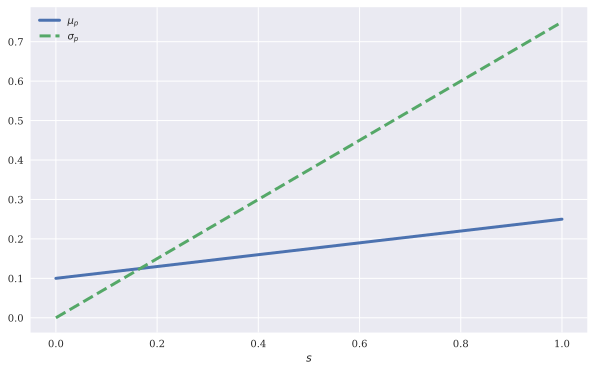

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(values, mu, lw = 3.0, label='$\mu_p$')
plt.plot(values, sigma, '--', lw = 3.0, label='$\sigma_p$')
plt.legend(loc=0)
plt.xlabel('$s$');

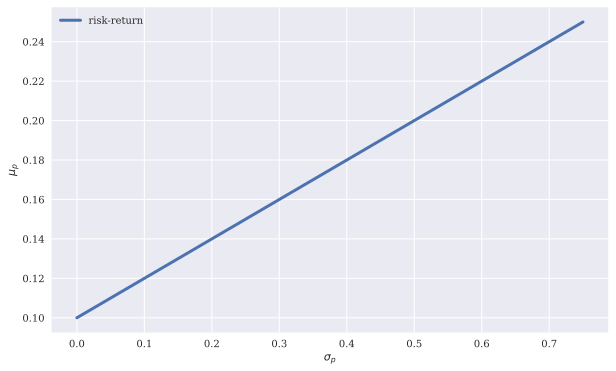

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(sigma, mu, lw = 3.0, label='risk-return')
plt.legend(loc=0)
plt.xlabel('$\sigma_p$')
plt.ylabel('$\mu_p$');